# Heaps

Heaps are a type of binary tree that satisfy the heap property. The heap property states that the value of a node must be greater than or equal to (in a max heap) or less than or equal to (in a min heap) the values of its children. This property must be satisfied for all nodes in the tree.

Heaps are commonly used to implement priority queues, which are data structures that allow for efficient access to the element with the highest (or lowest) priority. The heap property ensures that the element with the highest priority is always at the root of the tree.


## Operations

The most common operations on a heap are:

- `insert`: Add a new element to the heap.
- `extract`: Remove and return the element with the highest priority.
- `peek`: Return the element with the highest priority without removing it.
- `heapify`: Convert an array of elements into a heap.
- `merge`: Merge two heaps into a single heap.


In [1]:
# represent the tree using graphviz
%matplotlib inline
from graphviz import Digraph

def draw_tree(root):
    dot = Digraph(format='svg', node_attr={'shape': 'circle'})
    def draw_node(node):
        if node.left:
            dot.edge(str(node.value), str(node.left.value), label='L')
            draw_node(node.left)
        if node.right:
            dot.edge(str(node.value), str(node.right.value), label='R')
            draw_node(node.right)
    draw_node(root)
    display(dot)

### Implementation

In [2]:
class Node:
    def __init__(self, value, parent=None):
        self.value = value
        self.parent = parent
        self.left = None
        self.right = None

    def __repr__(self) -> str:
        return f"Node({self.value})"

In [32]:
class MaxHeap:
    def __init__(self) -> None:
        self.top = None

    def insert(self, data):
        if self.top is None:
            self.top = Node(data)
            return
        
        cur = None
        queue = [self.top]
        while len(queue) > 0:
            cur = queue.pop(0)
            # print(queue)
            if cur.left is None:
                cur.left = Node(data, cur)
                cur = cur.left
                break
            elif cur.right is None:
                cur.right = Node(data, cur)
                cur = cur.right
                break
            
            if cur.left is not None:
                queue.append(cur.left)
            if cur.right is not None:
                queue.append(cur.right)
        # print(cur.value, cur.parent.value)
        while cur.parent and cur.value > cur.parent.value:
            self.swap_up(cur)
            cur = cur.parent
        # print(cur.value, cur.parent.value)

    def swap_up(self, node):
        tmp = node.value
        node.value = node.parent.value
        node.parent.value = tmp

        
    def get_max(self):
        return self.top.value
    
    def delete(self, data):
        if self.top is None:
            return None
        if self.top.left is None and self.top.right is None:
            if self.top.value == data:
                self.top = None
            else:
                return None
        
        cur = None
        target = None
        queue = [self.top]
        while len(queue) > 0:
            cur = queue.pop(0)
            if cur.value == data:
                target = cur
            if cur.left is not None:
                queue.append(cur.left)
            if cur.right is not None:
                queue.append(cur.right)

        target.value = cur.value
        if cur == cur.parent.left:
            cur.parent.left = None
        else:
            cur.parent.right = None
        
        while (target.left or target.right) and (target.value < target.left.value or target.value < target.left.value):
            target = self.swap_down(target)

    def pop_max(self):
        val = self.top.value
        self.delete(self.top.value)
        return val

    def swap_down(self, node):
        def swap_left():
            tmp = node.value
            node.value = node.left.value
            node.left.value = tmp
            return node.left
        
        def swap_right():
            tmp = node.value
            node.value = node.right.value
            node.right.value = tmp
            return node.right
        
        if node.value < node.left.value and node.value < node.right.value:
            if node.left.value > node.right.value:
                return swap_left()
            else:
                return swap_right()
        elif node.value < node.left.value:
            return swap_left()
        else:
            return swap_right()


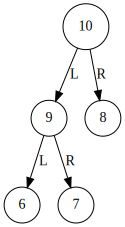

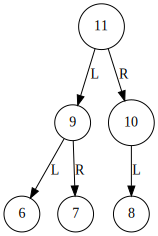

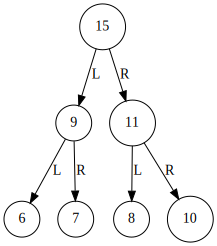

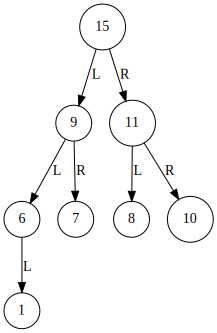

In [33]:
max_heap = MaxHeap()
max_heap.insert(10)
max_heap.insert(9)
max_heap.insert(8)
max_heap.insert(6)
max_heap.insert(7)
draw_tree(max_heap.top)
max_heap.insert(11)
draw_tree(max_heap.top)
max_heap.insert(15)
draw_tree(max_heap.top)
max_heap.insert(1)
draw_tree(max_heap.top)

In [34]:
max_heap.get_max()

15

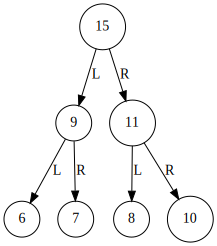

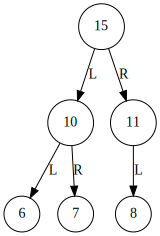

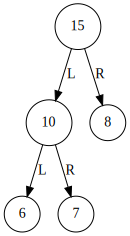

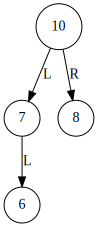

In [35]:
max_heap.delete(1)
draw_tree(max_heap.top)
max_heap.delete(9)
draw_tree(max_heap.top)
max_heap.delete(11)
draw_tree(max_heap.top)
max_heap.delete(15)
draw_tree(max_heap.top)

In [36]:
max_heap.pop_max()

10

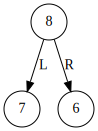

In [37]:
draw_tree(max_heap.top)